In [1]:
# Install the required packages

import sys
!{sys.executable} -m pip install matplotlib

import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
# Load the data from the pickle files

data = pd.read_pickle('NewData/trainData_20k_3_2.pkl')
data_test = pd.read_pickle('NewData/testData_20k_3_2.pkl')

In [4]:
# data_same_ratio = data[data['binding']== 1]
# data_same_ratio = data_same_ratio.append(data[data['binding']==0].sample(429078))
# data_same_ratio

In [5]:
# Name changes

data_same_ratio = data
data_same_ratio 

,tcr1,tcr2,tcr_embeds1,tcr_embeds2,binding
0,CSVDDRGGYTF,CASSWGTSGGRSTDTQYF,"[-0.03175964206457138, -0.045549653470516205, ...","[-0.16762247681617737, 0.20628410577774048, 0....",1
1,CASRPPAAAADKTQYF,CASSLFRGGSYNEQFF,"[0.0684240534901619, -0.04493197798728943, -0....","[-0.06096441671252251, -0.2497183084487915, -0...",1
2,CASSQEEIVSGELFF,CASSLVDRANYGYTF,"[0.012700366787612438, -0.21220086514949799, 0...","[0.028100235387682915, -0.13780447840690613, 0...",1
3,CASSYLGVLADTQYF,CASSTAPGQGNEKLFF,"[-0.023521048948168755, -0.18888922035694122, ...","[-0.06832627952098846, -0.051708292216062546, ...",1
4,CASSTGFNIQYF,CSAKTGGYGYTF,"[-0.04366176202893257, -0.36174795031547546, 0...","[-0.04436733201146126, 0.041416049003601074, 0...",1
...,...,...,...,...,...
19995,CASSEVWDRGYEQYF,CATSRESSGANVLTF,"[-0.22019226849079132, -0.44557055830955505, 0...","[0.23127864301204681, -0.13703326880931854, 0....",0
19996,CASSQGGLVTEQFF,CASSADNGVETQYF,"[0.056454721838235855, -0.21171803772449493, -...","[0.18312621116638184, -0.2571496069431305, -0....",0
19997,CASSNNLYEQYF,CASTPGVAHTDTQYF,"[-0.08718084543943405, -0.5384163856506348, -0...","[-0.22755257785320282, -0.05113774165511131, 0...",0
19998,CASSETTVWNTGELFF,CASSLLGGRTYNEQFF,"[0.3476565480232239, -0.24161429703235626, 0.2...","[-0.018622305244207382, -0.2628035545349121, -...",0


In [6]:
data_test

,tcr1,tcr2,tcr_embeds1,tcr_embeds2,binding
0,CARANRRGGTQYF,CSARDRGQGASYEQYF,"[0.2486799657344818, -0.2617107927799225, 0.01...","[-0.24431940913200378, -0.3309246897697449, -0...",1
1,CSARGQAITDKLFF,CASRLRGMGIVNNELFF,"[-0.01148158311843872, -0.08856631815433502, 0...","[-0.2757743299007416, -0.16867314279079437, -0...",1
2,CSASDRDLYEQYF,CSVECAGPIYNEQFF,"[-0.2526794970035553, -0.40408986806869507, -0...","[0.23576858639717102, -0.31900182366371155, -0...",1
3,CASSWNYEQYF,CSVGGSRTDSQYF,"[-0.18746687471866608, -0.4195854067802429, -0...","[0.10586055368185043, 0.23393410444259644, 0.1...",1
4,CSARDWVGYTIYF,CSVVTGGTNENLFF,"[-0.23337295651435852, -0.42551276087760925, 0...","[0.2668687403202057, -0.07795975357294083, -0....",1
...,...,...,...,...,...
1995,CASSPAPAGGGELFF,CASGLAWTESNQPQHF,"[0.0565611757338047, -0.04730141535401344, -0....","[-0.21515771746635437, -0.4893549978733063, -0...",0
1996,CASSAGTGGRHQPQHF,GSVETQYF,"[0.029413092881441116, -0.35827669501304626, -...","[0.632827877998352, -0.03847785294055939, -0.3...",0
1997,CSSSQSPCGTQYF,FSARFMENSGNTIYF,"[0.17707262933254242, -0.1046127900481224, 0.0...","[0.7711445689201355, -0.012472263537347317, -0...",0
1998,CAISGIAGGQNEQFF,CAISYKELNTEAFF,"[-0.1114099845290184, -0.22073718905448914, -0...","[-0.03353029489517212, -0.324806272983551, 0.1...",0


In [7]:
# Import the required packages for the model

import torch
import torch.nn as nn
import torch.optim as optim

# Define the Siamese Network architecture
class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()
        self.fc1 = nn.Linear(1024, 512)
        self.dropout = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(512, 512)
        self.dropout = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(512, 256)
        self.dropout = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 1)

    def forward_once(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout(x)
        x = torch.relu(self.fc4(x))
        x = torch.sigmoid(self.fc5(x))
        return x

    def forward(self, x1, x2):
        out1 = self.forward_once(x1)
        out2 = self.forward_once(x2)
        return out1, out2

# Define the contrastive loss function
def criterion1(output1,output2, label):
    loss = 0
    dif = output1.squeeze() - output2.squeeze()
    norm = torch.norm(dif, p=1, dim=dif.dim() - 1)
    dis = torch.exp(-norm)
    dis = torch.clamp(dis, min=1e-7, max=1.0 - 1e-7)
    criterion = nn.MSELoss()
    loss = criterion(dis, label)
    return loss



In [ ]:
data1 = data.sample(110000)
N = 100000
test = 10000
ep = 100

# create a dataset of input pairs and labels
input1 = torch.as_tensor(torch.from_numpy(np.vstack(data1['tcr_embeds1'].iloc[:N].values)))
input2 = torch.as_tensor(torch.from_numpy(np.vstack(data1['tcr_embeds2'].iloc[:N].values)))
labels = torch.tensor(np.transpose(data1['binding'].iloc[:N].values.astype(float)))


input1 = input1.to(torch.float32)
input2 = input2.to(torch.float32)
labels = labels.to(torch.float32)

t_input1 = torch.as_tensor(torch.from_numpy(np.vstack(data1['tcr_embeds1'].iloc[N:].values)))
t_input2 = torch.as_tensor(torch.from_numpy(np.vstack(data1['tcr_embeds2'].iloc[N:].values)))
t_labels = torch.tensor(np.transpose(data1['binding'].iloc[N:].values.astype(float)))


t_input1 = input1.to(torch.float32)
t_input2 = input2.to(torch.float32)
t_labels = labels.to(torch.float32)



loss_val = 0
# Train the Siamese Network
for epoch in range(ep):
    for i in range(N):
        #TCR1, TCR2 = data
        optimizer.zero_grad()
        output1, output2 = siamese_net(input1[i], input2[i])
        #dis = torch.abs(output1 - output2)

        loss = criterion1(output1,output2, labels[i])
        
        loss.backward()
        loss_val += loss
        optimizer.step()
    print("Epoch {}: Loss: {:.4f}".format(epoch+1, loss_val.item()/N))
    loss_val = 0


# Evaluate the Siamese Network
correct = 0
total = 0
with torch.no_grad():
    for i in range(N):
        #TCR1, TCR2 = data
        output1, output2 = siamese_net(t_input1[i], t_input2[i])
        euclidean_distance = torch.sqrt(torch.sum((output1 - output2)**2))
        prediction = (euclidean_distance < 0.5).long().item()
        total += 1
        correct += (prediction == t_labels[i]).long().item()

print("Val Accuracy: {:.2f}%".format(100 * correct / total))


Epoch 1: Loss: 0.4996
Epoch 2: Loss: 0.4998
Epoch 3: Loss: 0.4955
Epoch 4: Loss: 0.4968
Epoch 5: Loss: 0.4946
Epoch 6: Loss: 0.5003
Epoch 7: Loss: 0.4969
Epoch 8: Loss: 0.4951
Epoch 9: Loss: 0.4927
Epoch 10: Loss: 0.4979
Epoch 11: Loss: 0.4932
Epoch 12: Loss: 0.4965
Epoch 13: Loss: 0.4975
Epoch 14: Loss: 0.4965
Epoch 15: Loss: 0.4890
Epoch 16: Loss: 0.4975
Epoch 17: Loss: 0.4944
Epoch 18: Loss: 0.4936
Epoch 19: Loss: 0.4927
Epoch 20: Loss: 0.5378
Epoch 21: Loss: 0.5592
Epoch 22: Loss: 0.5168
Epoch 23: Loss: 0.5210
Epoch 24: Loss: 0.5347
Epoch 25: Loss: 0.5328
Epoch 26: Loss: 0.5270
Epoch 27: Loss: 0.5144
Epoch 28: Loss: 0.5288
Epoch 29: Loss: 0.5303
Epoch 30: Loss: 0.5460
Epoch 31: Loss: 0.5119
Epoch 32: Loss: 0.5103
Epoch 33: Loss: 0.5144
Epoch 34: Loss: 0.5237
Epoch 35: Loss: 0.5191
Epoch 36: Loss: 0.5371
Epoch 37: Loss: 0.5238
Epoch 38: Loss: 0.5078
Epoch 39: Loss: 0.5481
Epoch 40: Loss: 0.5200
Epoch 41: Loss: 0.5295
Epoch 42: Loss: 0.5308
Epoch 43: Loss: 0.5172
Epoch 44: Loss: 0.51

In [6]:

# Evaluate the Siamese Network
correct = 0
total = 0
with torch.no_grad():
    for i in range():
        #TCR1, TCR2 = data
        output1, output2 = siamese_net(t_input1[i], t_input2[i])
        euclidean_distance = torch.sqrt(torch.sum((output1 - output2)**2))
        prediction = (euclidean_distance < 0.5).long().item()
        total += 1
        correct += (prediction == t_labels[i]).long().item()

print("Accuracy: {:.2f}%".format(100 * correct / total))


Accuracy: 49.66%


In [6]:
data_same_ratio.sample(frac=1)

,tcr1,tcr2,tcr_embeds1,tcr_embeds2,binding
339937,CASSSGQGASYEQYF,CASSLYPGTAEGGYTF,"[-0.22137270867824554, -0.17720754444599152, -...","[0.020090676844120026, -0.17628328502178192, 0...",1
178253,ASSYSTGAGETQY,CASLVASGQETQYF,"[0.5500596165657043, 0.3859485387802124, -0.43...","[-0.21865703165531158, -0.1756519079208374, 0....",1
41868,CASSLGNTGELFF,CASSLGEQGILEGEKLFF,"[0.2152511328458786, -0.301587849855423, -0.10...","[-0.02165965549647808, -0.15632836520671844, -...",1
12984,CSVDRRADEQFF,CASSVGGGREQFF,"[-0.277070552110672, 0.19913417100906372, -0.0...","[0.08556389063596725, -0.34107860922813416, -0...",1
3070467,CASSLQSAGELFF,CSVPEGTITSGIYRGTQYF,"[0.07113952934741974, -0.12544237077236176, -0...","[0.12323027849197388, 0.20476503670215607, 0.0...",0
...,...,...,...,...,...
7222382,CASSDYGTDQFF,CSAKRTSGGAIGITDTQYF,"[0.05653565004467964, -0.5178253054618835, 0.1...","[-0.18569356203079224, 0.2049291580915451, -0....",0
103792,CASSLADRVQEYF,CASSLTGLRGQETQYF,"[-0.16821208596229553, -0.44754326343536377, 0...","[-0.08602176606655121, -0.12413894385099411, 0...",1
87282,CASSYNSANNEKLFF,CASSQAPAGGPGLGTDTQYF,"[0.2510944902896881, -0.22911381721496582, -0....","[0.040423065423965454, 0.1902630776166916, -0....",1
113919,CASSSTGETQYF,CASSLGVRNEQYF,"[0.09019208699464798, -0.34554624557495117, -0...","[-0.19870828092098236, -0.43782103061676025, -...",1


In [8]:
# Shuffle the data

data_same_ratio_1 = data_same_ratio.sample(frac=1)
data_same_ratio_1


,tcr1,tcr2,tcr_embeds1,tcr_embeds2,binding
13029,CATSREFQGMSGTEAFF,CASSPRGSGDFAGANVLTF,"[0.11072756350040436, -0.2632710635662079, -0....","[0.32748544216156006, 0.08624666929244995, -0....",0
13733,CASSSRAGVGQPQHF,CATSDWTSGRATEQYF,"[0.03672529011964798, -0.1977364867925644, -0....","[-0.2845004200935364, -0.20719759166240692, -0...",0
7078,CASRQNSGSSYNEQFF,CASSLVGGQAGNQPQHF,"[0.25040826201438904, 0.09386841952800751, -0....","[0.030997514724731445, -0.3324875831604004, -0...",1
958,CASSLVQGVVGYTF,CASSLGERVGYGYTF,"[-0.0441863015294075, -0.31126412749290466, 0....","[-0.03256877511739731, 0.07987063378095627, 0....",1
17952,CATSERTGNEQFF,CASSYTGWRSYEQYF,"[-0.12586632370948792, -0.15310786664485931, -...","[-0.3842458724975586, -0.22859083116054535, 0....",0
...,...,...,...,...,...
6264,CASSSSGNYEQYV,CASSLPPPGGGAFF,"[-0.06995590031147003, -0.09922642260789871, -...","[-0.05339042469859123, -0.2878877818584442, 0....",1
4998,CASSLWVGSGEAFF,CASSPSGASTDTQYF,"[-0.16696642339229584, -0.24717266857624054, 0...","[-0.07316059619188309, 0.11308250576257706, -0...",1
5569,CASSQYNEQFF,CASNLLGPQSNQPQHF,"[0.0331391803920269, -0.3079855740070343, -0.3...","[0.07840592414140701, -0.36192721128463745, -0...",1
9573,CASSIFRADGYGYTF,CASSLSGQGYDEQYF,"[-0.16932465136051178, -0.006643048953264952, ...","[-0.2918749451637268, -0.164970263838768, -0.0...",1


In [9]:
# Show the test data

data_test

,tcr1,tcr2,tcr_embeds1,tcr_embeds2,binding
0,CARANRRGGTQYF,CSARDRGQGASYEQYF,"[0.2486799657344818, -0.2617107927799225, 0.01...","[-0.24431940913200378, -0.3309246897697449, -0...",1
1,CSARGQAITDKLFF,CASRLRGMGIVNNELFF,"[-0.01148158311843872, -0.08856631815433502, 0...","[-0.2757743299007416, -0.16867314279079437, -0...",1
2,CSASDRDLYEQYF,CSVECAGPIYNEQFF,"[-0.2526794970035553, -0.40408986806869507, -0...","[0.23576858639717102, -0.31900182366371155, -0...",1
3,CASSWNYEQYF,CSVGGSRTDSQYF,"[-0.18746687471866608, -0.4195854067802429, -0...","[0.10586055368185043, 0.23393410444259644, 0.1...",1
4,CSARDWVGYTIYF,CSVVTGGTNENLFF,"[-0.23337295651435852, -0.42551276087760925, 0...","[0.2668687403202057, -0.07795975357294083, -0....",1
...,...,...,...,...,...
1995,CASSPAPAGGGELFF,CASGLAWTESNQPQHF,"[0.0565611757338047, -0.04730141535401344, -0....","[-0.21515771746635437, -0.4893549978733063, -0...",0
1996,CASSAGTGGRHQPQHF,GSVETQYF,"[0.029413092881441116, -0.35827669501304626, -...","[0.632827877998352, -0.03847785294055939, -0.3...",0
1997,CSSSQSPCGTQYF,FSARFMENSGNTIYF,"[0.17707262933254242, -0.1046127900481224, 0.0...","[0.7711445689201355, -0.012472263537347317, -0...",0
1998,CAISGIAGGQNEQFF,CAISYKELNTEAFF,"[-0.1114099845290184, -0.22073718905448914, -0...","[-0.03353029489517212, -0.324806272983551, 0.1...",0


In [10]:
# create a dataset of input pairs and labels. Data is shuffled. Define the size of the training set.

N = 18000  #600000
val = 2000 #100000
test = 2000 #258156

print("Training set size: ", N)
# create a dataset of input pairs and labels
input1 = torch.as_tensor(torch.from_numpy(np.vstack(data_same_ratio_1['tcr_embeds1'].iloc[:N].values)))
input2 = torch.as_tensor(torch.from_numpy(np.vstack(data_same_ratio_1['tcr_embeds2'].iloc[:N].values)))
labels = torch.tensor(np.transpose(data_same_ratio_1['binding'].iloc[:N].values.astype(float)))
true_value_train = data_same_ratio_1[['tcr1','tcr2']].iloc[:N].values

input1 = input1.to(torch.float32)
input2 = input2.to(torch.float32)
labels = labels.to(torch.float32)
print(" input1 shape: ", input1.shape)

print("Validation set size: ", val)
# Validation set
v_input1 = torch.as_tensor(torch.from_numpy(np.vstack(data_same_ratio_1['tcr_embeds1'].iloc[N:].values)))
v_input2 = torch.as_tensor(torch.from_numpy(np.vstack(data_same_ratio_1['tcr_embeds2'].iloc[N:].values)))
v_labels = torch.tensor(np.transpose(data_same_ratio_1['binding'].iloc[N:].values.astype(float)))

v_input1 = v_input1.to(torch.float32)
v_input2 = v_input2.to(torch.float32)
v_labels = v_labels.to(torch.float32)
print(" v_input1 shape: ", v_input1.shape)

print("Test set size: ", test)
# Test set
t_input1 = torch.as_tensor(torch.from_numpy(np.vstack(data_test['tcr_embeds1'].values)))
t_input2 = torch.as_tensor(torch.from_numpy(np.vstack(data_test['tcr_embeds2'].values)))
t_labels = torch.tensor(np.transpose(data_test['binding'].values.astype(float)))
true_value_test = data_test[['tcr1','tcr2']].values

t_input1 = t_input1.to(torch.float32)
t_input2 = t_input2.to(torch.float32)
t_labels = t_labels.to(torch.float32)
print(" t_input1 shape: ", t_input1.shape)

Training set size:  18000
 input1 shape:  torch.Size([18000, 1024])
Validation set size:  2000
 v_input1 shape:  torch.Size([2000, 1024])
Test set size:  2000
 t_input1 shape:  torch.Size([2000, 1024])


====================== epoch 1
Val Accuracy: 48.45%
Loss: 0.3397
====================== epoch 2
Val Accuracy: 51.75%
Loss: 0.3313
====================== epoch 3
Val Accuracy: 51.25%
Loss: 0.3344
====================== epoch 4
Val Accuracy: 49.15%
Loss: 0.3320
====================== epoch 5
Val Accuracy: 50.35%
Loss: 0.3324
====================== epoch 6
Val Accuracy: 50.40%
Loss: 0.4205
====================== epoch 7
Val Accuracy: 48.40%
Loss: 0.3462
====================== epoch 8
Val Accuracy: 51.90%
Loss: 0.3510
====================== epoch 9
Val Accuracy: 49.25%
Loss: 0.3667
====================== epoch 10
Val Accuracy: 49.50%
Loss: 0.3717
====================== epoch 11
Val Accuracy: 50.05%
Loss: 0.3489
====================== epoch 12
Val Accuracy: 49.75%
Loss: 0.3442
====================== epoch 13
Val Accuracy: 53.95%
Loss: 0.3528
====================== epoch 14
Val Accuracy: 49.85%
Loss: 0.4009
====================== epoch 15
Val Accuracy: 48.75%
Loss: 0.4569
===================

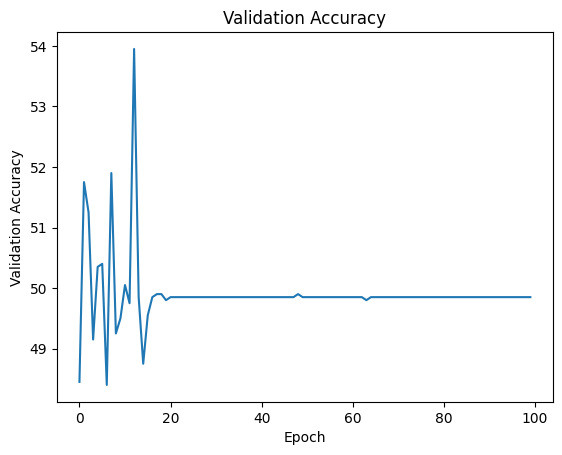

In [11]:
# Initialize the Siamese Network and the contrastive loss
siamese_net = SiameseNetwork() 
criterion = nn.L1Loss() #L1Loss() #HingeEmbeddingLoss() #ContrastiveLoss()

# Initialize the optimizer
optimizer = optim.Adam(siamese_net.parameters(), lr=0.001) #0.0005

# Initialize the loss value, number of epochs and the validation accuracy
loss_val = 0 # loss value
ep = 100 # number of epochs
val_graph = []  # validation accuracy

# Train the Siamese Network
for epoch in range(ep):
    print("====================== epoch "+str(epoch+1))
    for i in range(N):
        # Forward pass
        optimizer.zero_grad()
        output1, output2 = siamese_net(input1[i].unsqueeze(0), input2[i].unsqueeze(0)) 
        output1 = output1.squeeze() 
        output2 = output2.squeeze()

        # Compute the contrastive loss
        loss = criterion1(output1,output2, labels[i])
        
        # Backward pass
        loss.backward()
        loss_val += loss
        optimizer.step()
    
    # Evaluate the Siamese Network
    correct = 0
    total = 0
    with torch.no_grad():
        # Validation set
        for i in range(val):
            output1, output2 = siamese_net(v_input1[i].unsqueeze(0), v_input2[i].unsqueeze(0))
            output1 = output1.squeeze()
            output2 = output2.squeeze()
            euclidean_distance = torch.sqrt(torch.sum((output1 - output2)**2))
            prediction = (euclidean_distance < 0.5).long().item()
            total += 1
            correct += (prediction == v_labels[i]).long().item()

    # Graph the validation accuracy
    val_graph.append(100 * correct / total)
    print("Val Accuracy: {:.2f}%".format(100 * correct / total))
    print("Loss: {:.4f}".format(loss_val.item()/N))
    loss_val = 0

plt.title('Validation Accuracy')
plt.plot(val_graph)
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.show()


In [12]:
# Evaluate the Siamese Network
correct = 0
total = 0
ouyput_data = []
y_pred = []
with torch.no_grad():
    for i in range(test):
        #TCR1, TCR2 = data
        output1, output2 = siamese_net(t_input1[i], t_input2[i])
        euclidean_distance = torch.sqrt(torch.sum((output1 - output2)**2))
        prediction = (euclidean_distance < 0.5).long().item()
        y_pred.append(prediction)
        total += 1
        correct += (prediction == t_labels[i]).long().item()

print("Accuracy: {:.2f}%".format(100 * correct / total))
print(classification_report(t_labels, y_pred))


Accuracy: 50.00%
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1000
         1.0       0.50      1.00      0.67      1000

    accuracy                           0.50      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.25      0.50      0.33      2000



/Users/wingman2.0/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wingman2.0/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wingman2.0/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

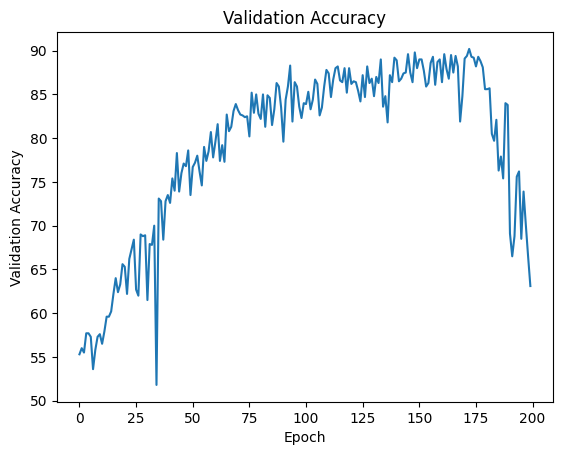

In [10]:
plt.title('Validation Accuracy')
plt.plot(val_graph)
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.show()


In [37]:
# Evaluate the Siamese Network
correct = 0
total = 0
ouyput_data = []
with torch.no_grad():
    for i in range(test):
        #TCR1, TCR2 = data
        output1, output2 = siamese_net(t_input1[i], t_input2[i])
        euclidean_distance = torch.sqrt(torch.sum((output1 - output2)**2))
        prediction = (euclidean_distance < 0.5).long().item()
        total += 1
        correct += (prediction == t_labels[i]).long().item()

print("Accuracy: {:.2f}%".format(100 * correct / total))


Accuracy: 50.50%


In [1]:
import numpy as np
import pandas as pd  

data = pd.read_pickle("TCR_epitope_embedding_data.pkl")

df_emb = data[['epi','tcr','epi_embeds','tcr_embeds','binding']]#.sample(frac=1,random_state=1).reset_index()
print("Training Data loaded\n")

counts = df_emb['epi'].value_counts().index.tolist()
counts 


Training Data loaded



['KLGGALQAK',
 'MIELSLIDFYLCFLAFLLFLVLIML',
 'YVLDHLIVV',
 'GLCTLVAML',
 'HTTDPSFLGRY',
 'GILGFVFTL',
 'NLVPMVATV',
 'FLWLLWPVTLACFVLAAV',
 'SEHDYQIGGYTEKW',
 'MGYINVFAFPFTIYSL',
 'FVDGVPFVV',
 'FLNGSCGSV',
 'TPRVTGGGAM',
 'KLSYGIATV',
 'LLWNGPMAV',
 'LPRRSGAAGA',
 'LVVDFSQFSR',
 'AELAKNVSLDNVL',
 'APKEIIFLEGETL',
 'LSPRWYFYYL',
 'GLEAPFLYLYALVYFLQSINFVRIIMR',
 'AVFDRKSDAK',
 'VQPTESIVRFPNITNLCPF',
 'KLPDDFTGCV',
 'VLPFNDGVYFASTEK',
 'IMLIIFWFSL',
 'VQELYSPIFLIV',
 'FVCNLLLLFVTVYSHLLLV',
 'GMEVTPSGTWLTY',
 'ELAGIGILTV',
 'QLMCQPILLL',
 'LLLDDFVEII',
 'STLPETAVVRR',
 'SELVIGAVIL',
 'RQLLFVVEV',
 'YEDFLEYHDVRVVL',
 'FLPRVFSAV',
 'YAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFT',
 'KAYNVTQAF',
 'RAKFKQLL',
 'MPASWVMRI',
 'VLWAHGFEL',
 'FPPTSFGPL',
 'VLPPLLTDEMIAQYT',
 'AYSNNSIAIPTNFTISV',
 'TVLSFCAFAV',
 'GDAALALLLLDRLNQL',
 'WICLLQFAY',
 'TLIGDCATV',
 'NPLLYDANYFLCW',
 'YEQYIKWPWYI',
 'VPHVGEIPVAYRKVLL',
 'ILLIIMRTFKVSIWNLDYII',
 'VLHSYFTSDYYQLY',
 'EAAGIGILTV',
 'KTAYSHLSTSK',
 'RSVASQSIIAY

In [2]:
counts[:5]

['KLGGALQAK',
 'MIELSLIDFYLCFLAFLLFLVLIML',
 'YVLDHLIVV',
 'GLCTLVAML',
 'HTTDPSFLGRY']

In [ ]:
d = df_emb.loc[(df_emb['epi']==counts[0])]
for i in range(5):
    d = pd.concat([d,df_emb.loc[(df_emb['epi']==counts[i])]])
d = d.reset_index()
data = d[['epi','tcr','epi_embeds','tcr_embeds','binding']]
data
